In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install git+https://github.com/kieferk/pymssa.git

  Cloning https://github.com/kieferk/pymssa.git to /tmp/pip-req-build-lh9is8ej
  Running command git clone --filter=blob:none --quiet https://github.com/kieferk/pymssa.git /tmp/pip-req-build-lh9is8ej
  Resolved https://github.com/kieferk/pymssa.git to commit 9d4d3e2c317ef64d0604796cf3fbdf9b5dc8e7fe
  Preparing metadata (setup.py) ... done
  Created wheel for pymssa: filename=pymssa-0.1.0-py3-none-any.whl size=13848 sha256=757631b582ca029ab22975742af2f85e13e8b9f0b9ceeb58f732723c8a0be0b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-4yjz4bm7/wheels/d9/d3/ff/cdbc753eaa7018b7b443cef4bf0cd5d42b1be5247471a31fc8
Successfully built pymssa


In [4]:
from pymssa import MSSA

In [13]:

from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
file_path_1 = 'ETHUSD.csv'
file_path_2 = 'IceaCreamFrozenDessert.csv'
ETH_df = pd.read_csv(file_path_1)
IceCream_df = pd.read_csv(file_path_2)
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
ETH_df = ETH_df.dropna()

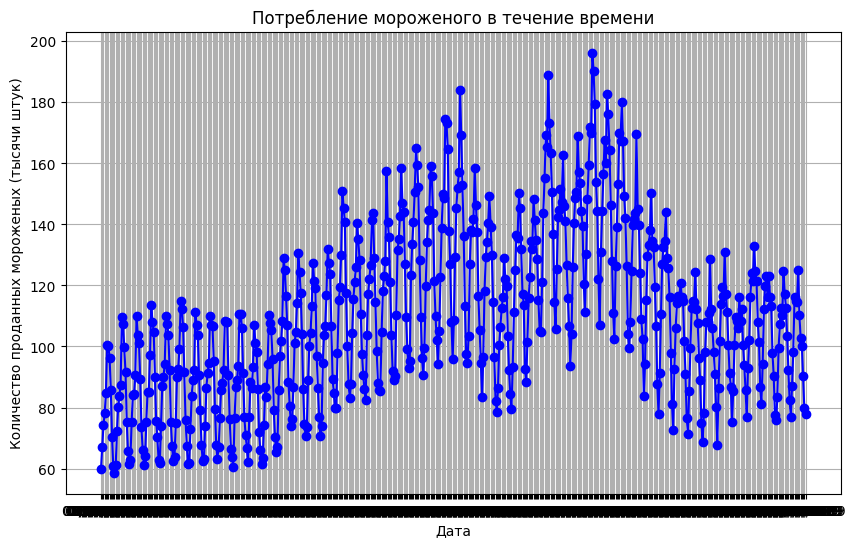

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(IceCream_df['DATE'], IceCream_df['value'], marker='o', linestyle='-', color='b')
plt.title('Потребление мороженого в течение времени')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

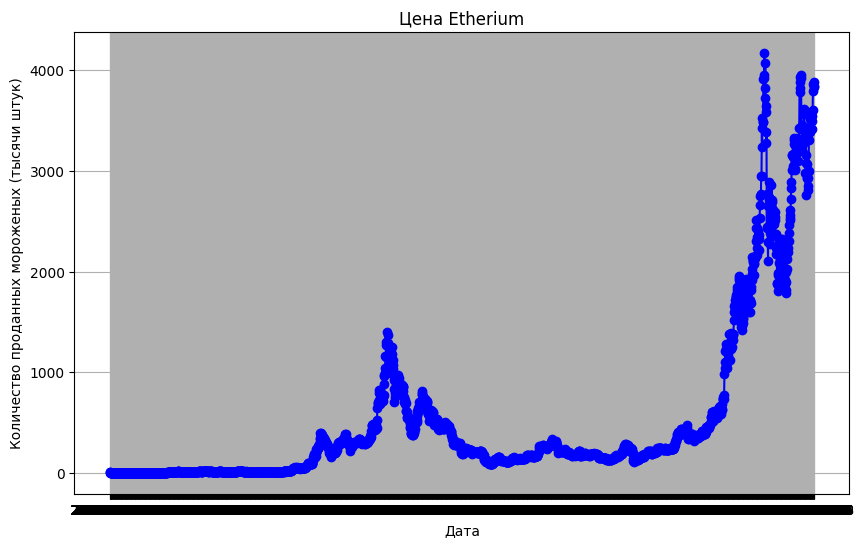

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ETH_df['Date'], ETH_df['Open'], marker='o', linestyle='-', color='b')
plt.title('Цена Etherium')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

1. Преобразование Фурье.

In [8]:
data1= ETH_df[['Open']].to_numpy()
data2=IceCream_df['value'].to_numpy()

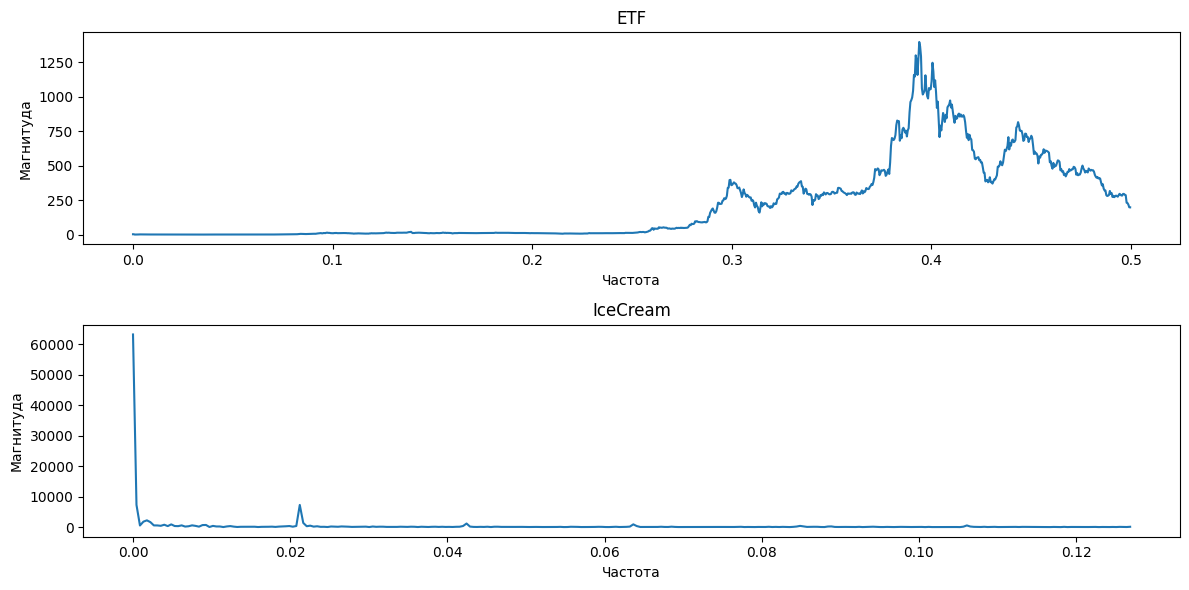

In [ ]:
fft1 = np.fft.fft(data1)
fft2 = np.fft.fft(data2)

freq = np.fft.fftfreq(len(data1))

# Амплитуды (магнитуды)
magnitude1 = np.abs(fft1)
magnitude2 = np.abs(fft2)

# Диаграмма магнитуды
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq[:len(data1)//2], magnitude1[:len(data1)//2])
plt.title('ETF')
plt.xlabel('Частота')
plt.ylabel('Магнитуда')

plt.subplot(2, 1, 2)
plt.plot(freq[:len(data2)//2], magnitude2[:len(data2)//2])
plt.title('IceCream')
plt.xlabel('Частота')
plt.ylabel('Магнитуда')

plt.tight_layout()
plt.show()

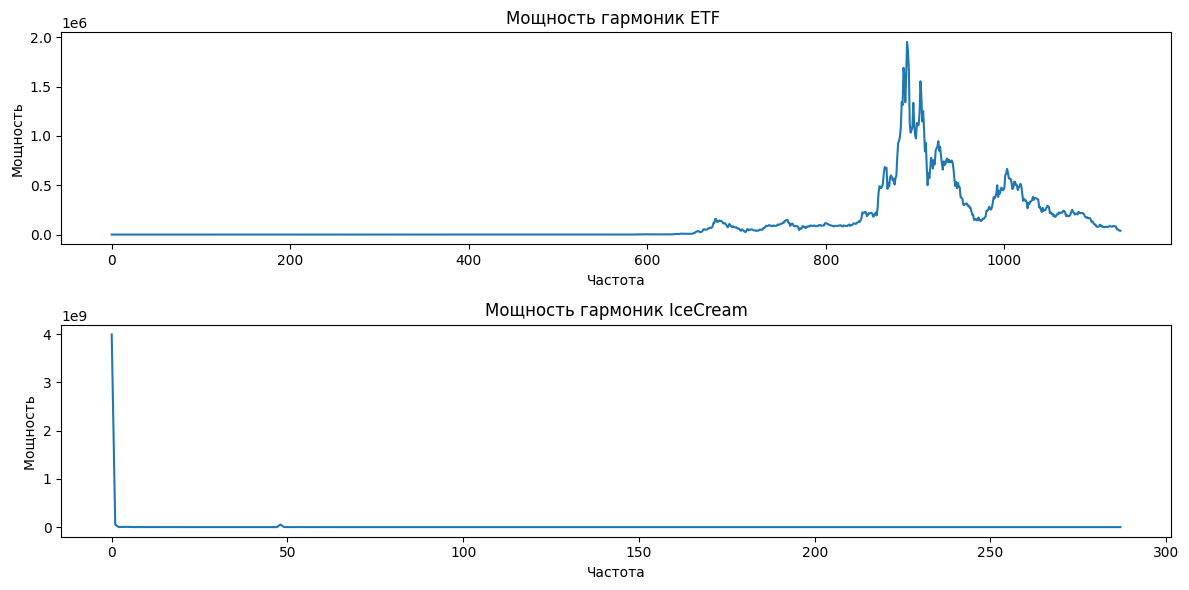

In [ ]:
# Вычисление преобразования Фурье
fft1 = np.fft.fft(data1)
fft2 = np.fft.fft(data2)

# Диаграмма мощности гармоник
power_spectrum1 = np.abs(fft1) ** 2
power_spectrum2 = np.abs(fft2) ** 2

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(power_spectrum1[:len(data1)//2])
plt.title('Мощность гармоник ETF ')
plt.xlabel('Частота')
plt.ylabel('Мощность')

plt.subplot(2, 1, 2)
plt.plot(power_spectrum2[:len(data2)//2])
plt.title('Мощность гармоник IceCream')
plt.xlabel('Частота')
plt.ylabel('Мощность ')

plt.tight_layout()
plt.show()

In [ ]:
mssa_ETF = MSSA(n_components=None,
            window_size=50,
            verbose=True)

mssa_IceCream = MSSA(n_components=None,
            window_size=12,
            verbose=True)

In [ ]:
mssa_ETF.fit(data1)

Constructing trajectory matrix
Trajectory matrix shape: (50, 2213)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


2. Сингулярное спектральное разложение

In [ ]:
mssa_IceCream.fit(data2)

Constructing trajectory matrix
Trajectory matrix shape: (12, 565)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


In [ ]:
mssa_ETF.component_ranks_[0:5].T[0]


array([0, 2, 3, 7, 9])

In [ ]:
mssa_IceCream.component_ranks_[0:5].T[0]

array([ 0,  1,  3, 10,  9])

In [ ]:
ts_opt_components_ETF = mssa_ETF.components_[0].T[mssa_ETF.component_ranks_[0:5].T[0]]


In [ ]:
ts_opt_components_IceCream = mssa_IceCream.components_[0].T[mssa_IceCream.component_ranks_[0:5].T[0]]

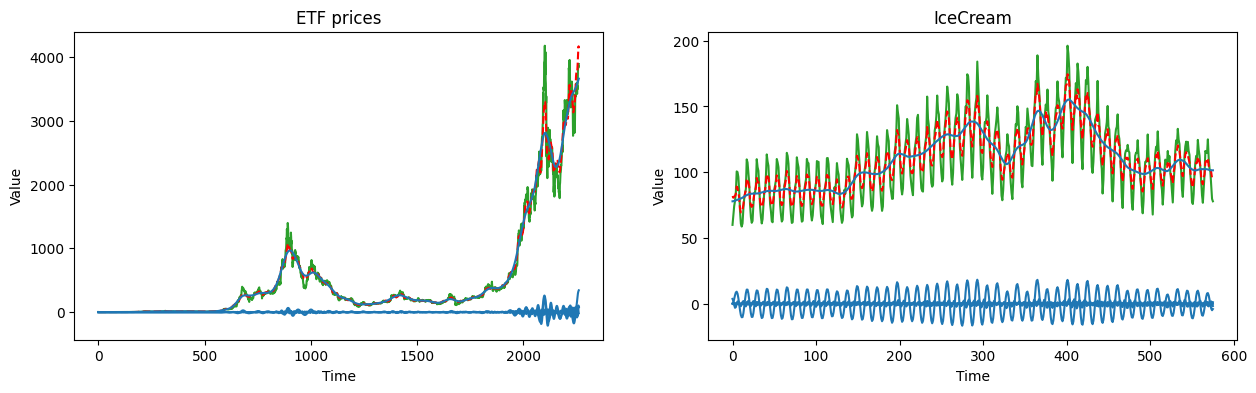

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(data1, color='tab:green')
axs[0].plot(np.sum(ts_opt_components_ETF, axis=0), '--', color='red', ms=1)
axs[0].plot(ts_opt_components_ETF.T, color='tab:blue', linewidth=1.5)

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].set_title('ETF prices')


axs[1].plot(data2, color='tab:green')
axs[1].plot(np.sum(ts_opt_components_IceCream, axis=0), '--', color='red', ms=1)
axs[1].plot(ts_opt_components_IceCream.T, color='tab:blue', linewidth=1.5)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].set_title('IceCream')

plt.show()

Зеленый график соответствует исходному ряду, синие компоненты SSA разложения и красный график - сумма компонент разложения. Благодаря разложению мы можем выделять тренд и шумовые составляются в виде гармоник с разной частотой.

3. Прогноз на несколько шагов с помощью SSA

In [ ]:
from sklearn.metrics import r2_score

In [18]:
ETF=ETH_df[['Open']].copy()
date_index= pd.date_range(start='7/8/2015', periods=ETF.shape[0], freq='D')
ETF.index = date_index
ETF.head()

,Open
2015-07-08,2.831620
2015-07-09,2.793760
2015-07-10,0.706136
2015-07-11,0.713989
2015-07-12,0.708087


In [27]:
tp=1131
ETF_tr = ETF.iloc[-tp:]
ETF_te = ETF.iloc[:-tp]
tr_means = np.nanmean(ETF_tr, axis=0)
ETF_tr = ETF_tr - tr_means
ETF_te = ETF_te - tr_means


In [45]:
mssa = MSSA(
            n_components='parallel_analysis',
            pa_percentile_threshold=95,
            window_size=50,
            verbose=True)
mssa.fit(ETF_tr)
print(mssa.components_.shape)

Constructing trajectory matrix
Trajectory matrix shape: (50, 1082)
Decomposing trajectory covariance matrix with SVD
Performing parallel analysis to determine optimal rank


  0%|          | 0/100 [00:00<?, ?it/s]

Rank selected via parallel analysis: 1
Constructing components
Calculating optimal reconstruction orders
(1, 1131, 1)


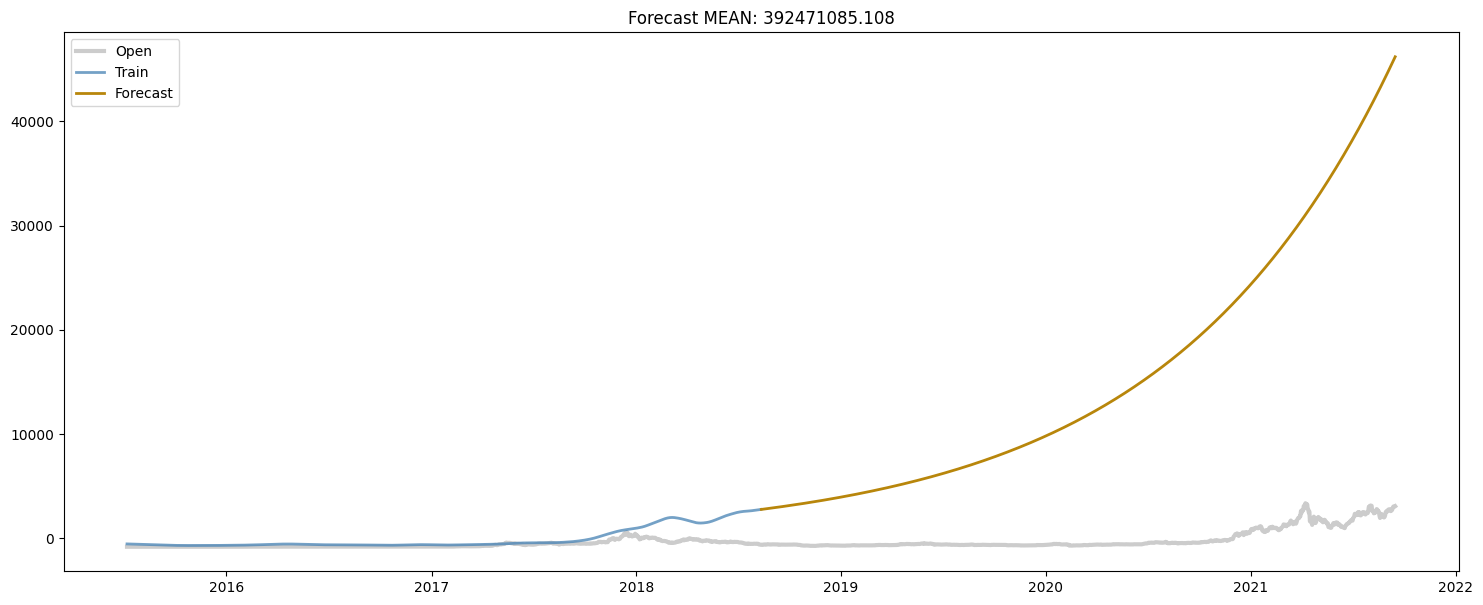

In [46]:
ETF_c=ETF-tr_means

for ts_index in range(ETF_c.shape[1]):
  tr = np.zeros(ETF_c.shape[0])
  tr[:] = np.nan
  te = np.copy(tr)
  tr[:-tp] = mssa.components_[ts_index, :, :].sum(axis=1)
  fc = mssa.forecast(tp, timeseries_indices=ts_index)

  ytrue = ETF_te.iloc[:, ts_index].values
  yhat = fc.ravel()[~pd.isnull(ytrue)]
  ytrue = ytrue[~pd.isnull(ytrue)]

  mean = mean_squared_error(ytrue, yhat)
  te[-tp:] = fc

  fig, ax = plt.subplots(figsize=(18, 7))
  ax.plot(ETF_c.index, ETF_c.iloc[:, ts_index].values, lw=3, alpha=0.2, c='k', label=ETF_c.columns[ts_index])
  ax.plot(ETF_c.index, tr, lw=2, c='steelblue', alpha=0.75, label='Train')
  ax.plot(ETF_c.index, te, lw=2, c='darkgoldenrod', label='Forecast')
  ax.set_title(f'Forecast MEAN: {mean:.3f}')
  ax.legend()

  plt.show()

In [47]:
IceCream=IceCream_df[['value']].copy()
date_index= pd.date_range(start='1/1/1972', periods=IceCream.shape[0], freq='D')
IceCream.index = date_index
IceCream.head()

,value
1972-01-01,59.9622
1972-01-02,67.0605
1972-01-03,74.2350
1972-01-04,78.1120
1972-01-05,84.7636


In [49]:
tp=288
IceCream_tr = IceCream.iloc[-tp:]
IceCream_te = IceCream.iloc[:-tp]
tr_means = np.nanmean(IceCream_tr, axis=0)
IceCream_tr = IceCream_tr - tr_means
IceCream_te = IceCream_te - tr_means


In [54]:
mssa = MSSA(
            variance_explained_threshold=0.95,
            window_size=None,
            verbose=True)
mssa.fit(IceCream_tr)
print(mssa.components_.shape)

Constructing trajectory matrix
Trajectory matrix shape: (144, 145)
Decomposing trajectory covariance matrix with SVD
Reduced rank to 25 according to SVHT threshold
Constructing components
Calculating optimal reconstruction orders
(1, 288, 25)


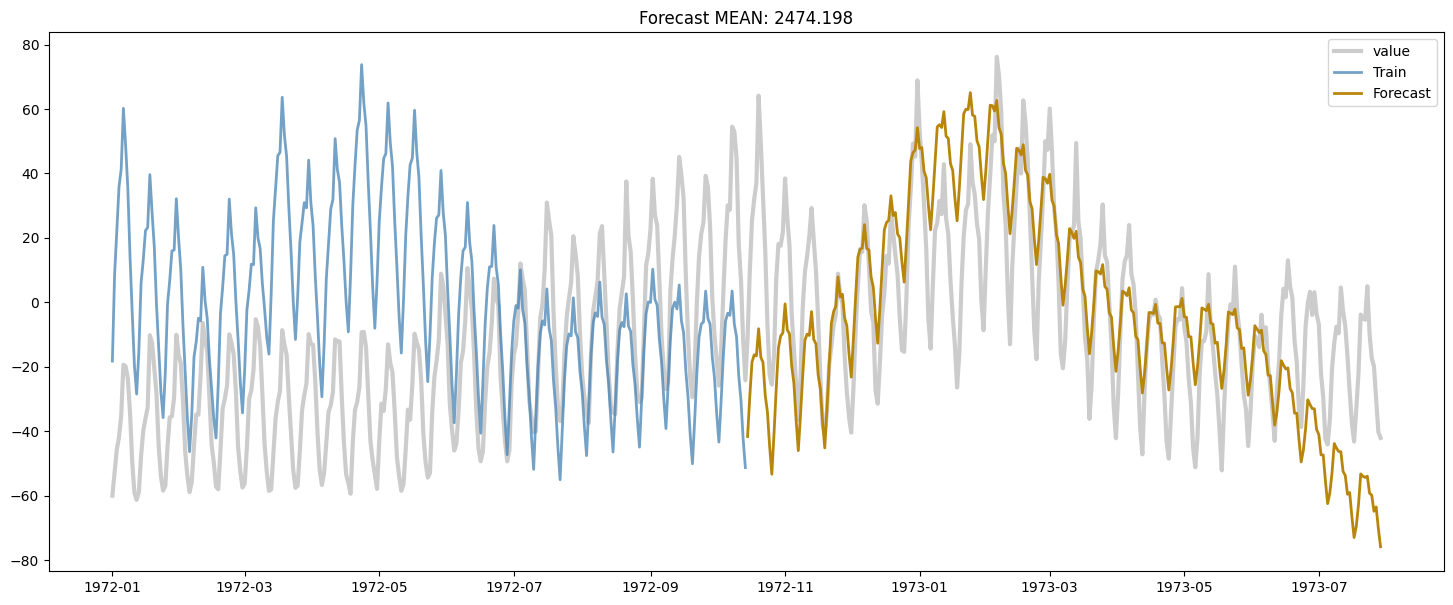

In [55]:
IceCream_c=IceCream-tr_means

for ts_index in range(IceCream_c.shape[1]):
  tr = np.zeros(IceCream_c.shape[0])
  tr[:] = np.nan
  te = np.copy(tr)
  tr[:-tp] = mssa.components_[ts_index, :, :].sum(axis=1)
  fc = mssa.forecast(tp, timeseries_indices=ts_index)

  ytrue = IceCream_te.iloc[:, ts_index].values
  yhat = fc.ravel()[~pd.isnull(ytrue)]
  ytrue = ytrue[~pd.isnull(ytrue)]

  mean = mean_squared_error(ytrue, yhat)
  te[-tp:] = fc

  fig, ax = plt.subplots(figsize=(18, 7))
  ax.plot(IceCream_c.index, IceCream_c.iloc[:, ts_index].values, lw=3, alpha=0.2, c='k', label=IceCream_c.columns[ts_index])
  ax.plot(IceCream_c.index, tr, lw=2, c='steelblue', alpha=0.75, label='Train')
  ax.plot(IceCream_c.index, te, lw=2, c='darkgoldenrod', label='Forecast')
  ax.set_title(f'Forecast MEAN: {mean:.3f}')
  ax.legend()

  plt.show()

4.Изображение автокорреляционных функций для обоих рядов.


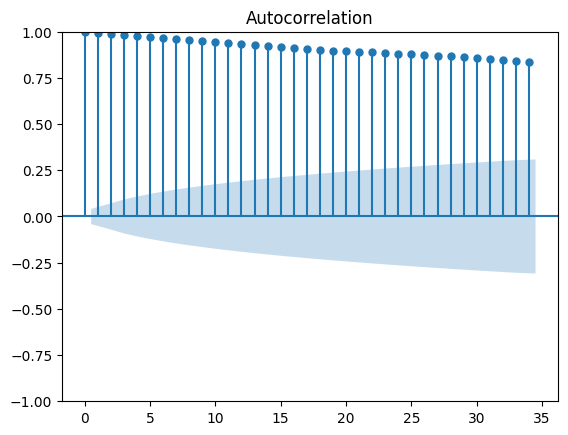

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

# график автокорреляционной функции
plot_acf( ETH_df['Open'].values)
plt.show()

Наблюдаем уменьшение корреляции,что значит что значения начинают меньше зависеть друг от друга при удалении

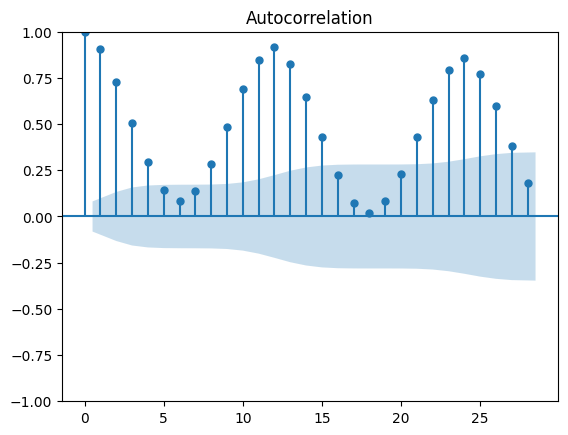

In [60]:

# Построение графика автокорреляционной функции
plot_acf(IceCream_df['value'].values)
plt.show()

Здесь видим повторение корреляции,что означает зависимость от предыдущих значений ряда.